In [1]:
# Importing all the necessary basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data from the dataset
data = pd.read_csv(r'seeds.csv')
data.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
# Checking for null values in the dataset
data.isnull().values.any()

False

In [4]:
# Checking the number of rows and columns of the dataset 
data.shape

(199, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             199 non-null    float64
 1   Perimeter        199 non-null    float64
 2   Compactness      199 non-null    float64
 3   Kernel.Length    199 non-null    float64
 4   Kernel.Width     199 non-null    float64
 5   Asymmetry.Coeff  199 non-null    float64
 6   Kernel.Groove    199 non-null    float64
 7   Type             199 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 12.6 KB


In [6]:
data.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


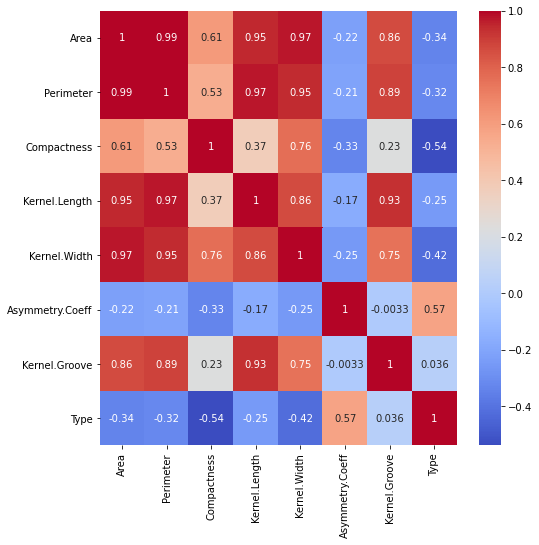

In [7]:
plt.figure(figsize=(8,8))
corr = data.corr()  # getting Correlation among the features of the dataset
sns.heatmap(corr, annot=True, cmap='coolwarm')
#plt.ylim(8,0)

In [8]:
# Standardize features by removing the mean and scaling to unit variance
# The standard score of a sample x is calculated as z = (x - u) / s
from sklearn.preprocessing import StandardScaler
ss= StandardScaler() 
data_new = ss.fit_transform(data)
data_new

array([[ 0.11716431,  0.18679667,  0.0081443 , ..., -1.00737062,
        -0.40826475, -1.22634124],
       [-0.01330197, -0.01975993,  0.44234139, ..., -1.82718718,
        -0.9454197 , -1.22634124],
       [-0.21586804, -0.38697165,  1.46979786, ..., -0.68162472,
        -1.21196249, -1.22634124],
       ...,
       [-0.59010028, -0.71593216,  0.75186803, ...,  3.14554887,
        -0.74195192,  1.23872853],
       [-1.05703224, -1.06019315, -0.80436312, ..., -0.06897709,
        -0.76636805,  1.23872853],
       [-0.89909937, -0.96073998, -0.10362921, ...,  1.32055406,
        -0.72770917,  1.23872853]])

In [9]:
x=data.drop(['Type'],axis=1)
y=data['Type']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=5)

In [24]:
import lightgbm as lgb
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.model_selection import RandomizedSearchCV

In [25]:
lgbm = lgb.LGBMClassifier()

In [26]:
params = { 'n_estimators' : sp_randint(50,200),
        'max_depth' : sp_randint(2,15),
         'learning_rate' : sp_uniform(0.201,0.5),
         'num_leaves' : sp_randint(20,50)}

In [27]:
rsearch = RandomizedSearchCV(lgbm, param_distributions=params, cv=3, n_iter=200, n_jobs=-1, random_state=3)

In [28]:
rsearch.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=LGBMClassifier(), n_iter=200, n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000030B40D0040>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000030B43C0FD0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000030B40D0340>,
                                        'num_leaves': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000030B41B7610>},
                   random_state=3)

In [29]:
rsearch.best_params_

{'learning_rate': 0.26859607657325874,
 'max_depth': 9,
 'n_estimators': 102,
 'num_leaves': 25}

In [31]:
lgbm = lgb.LGBMClassifier(**rsearch.best_params_)
lgbm.fit(x_train,y_train)

LGBMClassifier(learning_rate=0.26859607657325874, max_depth=9, n_estimators=102,
               num_leaves=25)

In [35]:
y_test_pred = lgbm.predict(x_test)
y_test_prob = lgbm.predict_proba(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

In [36]:
print('Confusion Matrix: \n',confusion_matrix(y_test,y_test_pred))
print('Overall Accuracy Test: ',accuracy_score(y_test,y_test_pred))
print('ROC AUC: ',roc_auc_score(y_test,y_test_prob,multi_class='ovr'))

Confusion Matrix: 
 [[25  0  1]
 [ 1 14  0]
 [ 1  0 18]]
Overall Accuracy Test:  0.95
ROC AUC:  0.9968817585294215


END